In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
def modelo1(t, c):
    # Parámetros del primer reactor
    V1 = 200; F0 = 300;
    k11 = 4; k12 = 4
    k21 = 3.2; k22 = 3.2
    CAf = 0.5
    
    # Balance de masa para el compuesto A en el primer reactor
    dc1 = F0/V1*(CAf - c[0]) - (k11 + k21)*c[0]
    dc2 = -F0/V1*c[1] + k11*c[0]
    dc3 = -F0/V1*c[2] + k21*c[0]
    return [dc1, dc2, dc3]

def modelo2(t, c, C1lag):
    # Parámetros en el segundo reactor
    V2 = 300; F0 = 300
    k12 = 4; k22 = 3.2
    CAf = 0.5; D = 0.1  # 1/h

    # Las condiciones antes y después del retardo
    if t - D > 0:
        CA1lag = np.interp(t - D, C1lag[:, 0], C1lag[:, 1])
        CB1lag = np.interp(t - D, C1lag[:, 0], C1lag[:, 2])
        CC1lag = np.interp(t - D, C1lag[:, 0], C1lag[:, 3])
    else:
        CA1lag = 0
        CB1lag = 0
        CC1lag = 0

    # Balance de masa para el compuesto A en el segundo reactor
    dc1 = F0/V2*(CA1lag - c[0]) - (k12 + k22)*c[0]
    dc2 = F0/V2*(CB1lag - c[1]) + k12*c[0]
    dc3 = F0/V2*(CC1lag - c[2]) + k22*c[0]
    return [dc1, dc2, dc3]

# Condiciones iniciales
c1_inicial = [8.5, 0, 0]
c2_inicial = [1, 0, 0]
# Rango de tiempo para la integración en horas
time_span = (0, 0.5)
t = np.linspace(0, 0.5, 100)  # Puntos en los que queremos la solución

# Integración del reactor 1
C1 = solve_ivp(modelo1, time_span, c1_inicial, t_eval=t, method='LSODA')
RC1 = np.column_stack((C1.t, C1.y.T))

# Integración del reactor 2
C2 = solve_ivp(modelo2, time_span, c2_inicial, t_eval=t, args=(RC1,), method='LSODA')

# Rescatamos los valores de las concentraciones en cada reactor
CA1, CB1, CC1 = C1.y # equivalente a C1.y[0], C1.y[1], C1.y[2]
CA2, CB2, CC2 = C2.y # equivalente a C2.y[0], C2.y[1], C2.y[2]

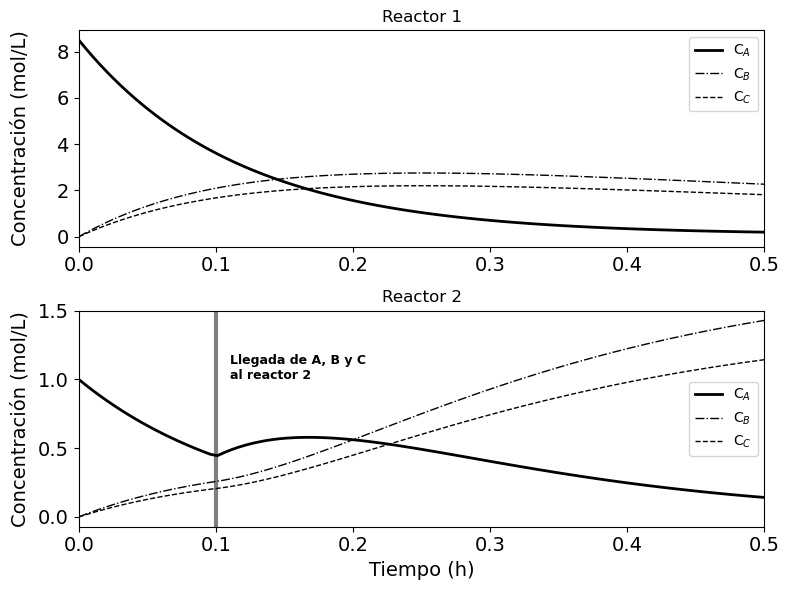

In [4]:
# Gráficos
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(t, CA1, 'k', lw=2, label=r'C$_{A}$')
plt.plot(t, CB1, 'k-.', lw=1, label=r'C$_{B}$')
plt.plot(t, CC1, 'k--', lw=1, label=r'C$_{C}$')
plt.title('Reactor 1')
plt.ylabel('Concentración (mol/L)', fontsize=14, labelpad=20)
plt.xlim(0, 0.5)
plt.tick_params(axis='both', labelsize=14)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, CA2,  'k', lw=2, label=r'C$_{A}$')
plt.plot(t, CB2, 'k-.', lw=1, label=r'C$_{B}$')
plt.plot(t, CC2, 'k--', lw=1, label=r'C$_{C}$')
plt.axvline(x=0.1, color='k', linewidth=3, alpha=0.5)
plt.text(0.11, 1, 'Llegada de A, B y C\nal reactor 2', fontsize=9, color='k', weight='bold')
plt.title('Reactor 2')
plt.xlabel('Tiempo (h)', fontsize=14)
plt.xlim(0, 0.5)
plt.ylabel('Concentración (mol/L)', fontsize=14, labelpad=6)
plt.tick_params(axis='both', labelsize=14)
plt.legend()

plt.tight_layout()
plt.show()